In [1]:
# impotrting libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns

sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")

#%matplotlib notebook
%load_ext nb_black

<IPython.core.display.Javascript object>

The structure of this notebook is: 
1. Loading and classification of Wine dataset
2. EDA and classification of Abalone Dataset


# Dataset 1: Wine 

Maximum accuracy:- 0.6253846153846154 at K = 45


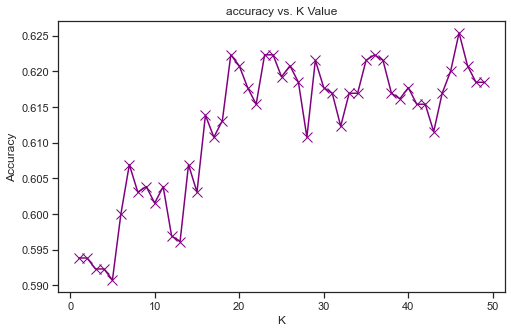

<IPython.core.display.Javascript object>

In [2]:
D = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]
L = "quality"
C = "color"
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

# Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=";")
# Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=";")
wine_w = wine_w.copy()
wine_w[C] = np.zeros(wine_w.shape[0])
wine_r[C] = np.ones(wine_r.shape[0])
wine = pd.concat([wine_w, wine_r])

target = wine.quality
features = wine.drop("quality", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=27
)
acc = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_predi))

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, 50),
    acc,
    color="purple",
    linestyle="solid",
    marker="x",
    markerfacecolor="red",
    markersize=10,
)
plt.title("accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
print("Maximum accuracy:-", max(acc), "at K =", acc.index(max(acc)))

In [3]:
knn = KNeighborsClassifier(n_neighbors=45, weights="distance", metric="euclidean")
knn.fit(X_train, y_train)
print("Parameters used in Classifier:\n", knn.get_params())
y_pred = knn.predict(X_test)

knn_train_acc = knn.score(X_train, y_train)
print("Training Score: ", knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print("Testing Score: ", knn_test_acc)

Parameters used in Classifier:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 45, 'p': 2, 'weights': 'distance'}
Training Score:  1.0
Testing Score:  0.62


<IPython.core.display.Javascript object>

### 2. Using normalized data to classify quality

In [4]:
feature_normalized = wine.drop(
    "quality", axis=1
)  ## dependent varibale is not normalized
feature_n = feature_normalized.apply(
    stats.zscore
)  ## independent variables are Z-normalized
# print(feature_n.head())

<IPython.core.display.Javascript object>

Maximum accuracy:- 0.6861538461538461 at K = 34


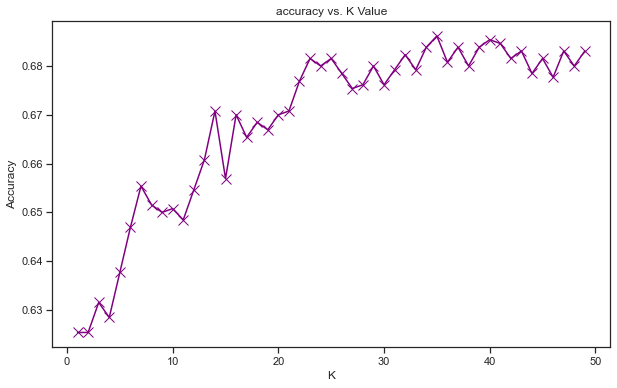

<IPython.core.display.Javascript object>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_n, target, test_size=0.2, random_state=27
)

# Using 80:20 ratio for our normalized data set also to compare classification accuracy with unnormalized data.
# Plotting accuracy vs K to determine the best value for K.
# using weighted KNN and euclidean distance metric

acc = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_predi))

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 50), acc, color="purple", linestyle="solid", marker="x", markersize=10,
)
plt.title("accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
print("Maximum accuracy:-", max(acc), "at K =", acc.index(max(acc)))

In [6]:
# Using the K value as found in above section, i.e, K=34
knn = KNeighborsClassifier(n_neighbors=34, weights="distance", metric="euclidean")
knn.fit(X_train, y_train)
print("Parameters used in Classifier:\n", knn.get_params())
y_pred = knn.predict(X_test)

knn_train_acc = knn.score(X_train, y_train)
print("Training Score: ", knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print("Testing Score: ", knn_test_acc)

Parameters used in Classifier:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 34, 'p': 2, 'weights': 'distance'}
Training Score:  1.0
Testing Score:  0.6838461538461539


<IPython.core.display.Javascript object>

     We can observe that normalized data performs better at classification task on test set comapred to un normalized data highlighting that normalization was critical for wine data set. 

#  DATASET 2: ABALONE

### 1.1 Load the dataset and explore the features and their ranges and distribution:

In [7]:
# Loading Data, adding columns name as provided in UCI.
abalone = pd.read_csv(
    r"C:\Users\hp\Desktop\Winter_22\KMDK\Assignment_1\abalone.csv",
    sep=",",
    names=[
        "Sex",
        "Length",
        "Diameter",
        "Height",
        "Whole_weight",
        "Shucked_weight",
        "Viscera_weight",
        "Shell_weight",
        "Rings",
    ],
)
display(abalone.head())

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<IPython.core.display.Javascript object>

## EDA (Exploratory Data Analysis)

We will perform the below analysis:
1. Number of columns [Features + target] and samples [record count]
2. Identifying data types of features [numerical or categorical/ continous or discrete] 
3. Summary of data to understand distribution skewness, scales and ranges
4. Checking for missing values
5. Univariate Analysis
6. Bivariate Analysis
7. Checking coorelation 
8. Normalization (Min-Max and Z-Score)
9. Comparison of unnormalized values
10. Classification
11. Weighted KNN classification and comparison
12. Ablation study (removing normalization)

In [8]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<IPython.core.display.Javascript object>

In [9]:
print(
    f"Abalone dataset has {abalone.shape[1]} columns and they have {abalone.shape[0]} samples."
)
print(abalone.columns)

Abalone dataset has 9 columns and they have 4177 samples.
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


<IPython.core.display.Javascript object>

- There are 4177 records and 9 columns. 
- Sex feature is categorical (object type)
- 'Rings' feature is discrete (int), others are continous numerical (float)

In [10]:
display(abalone.describe())

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>],
       [<AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

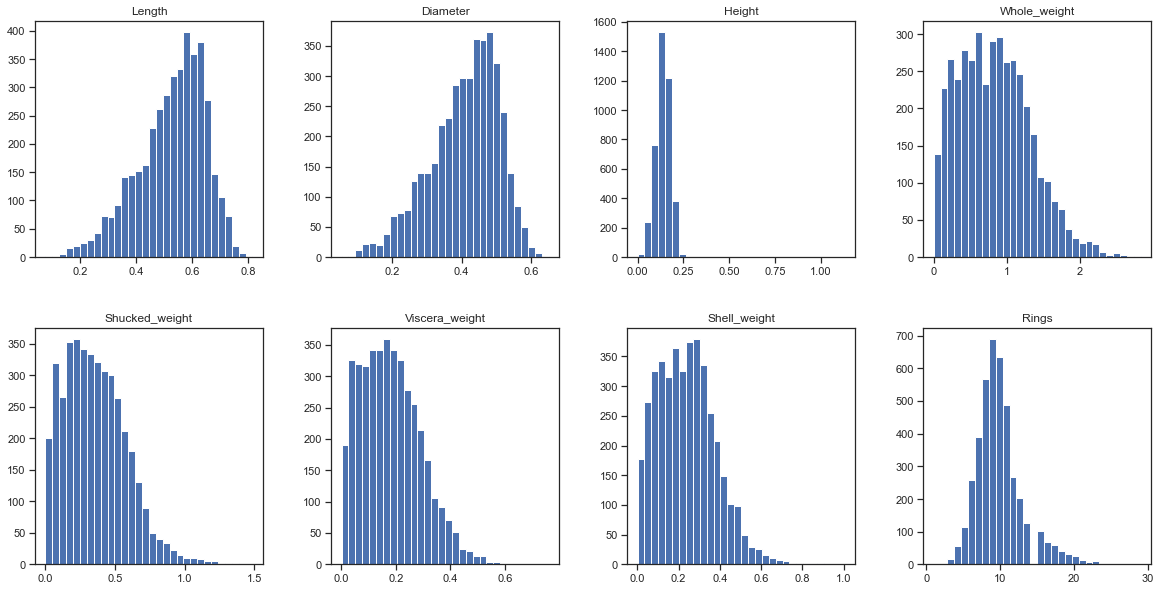

<IPython.core.display.Javascript object>

In [11]:
abalone.hist(figsize=(20, 10), grid=False, layout=(2, 4), bins=30)

* The features are close to normal distribution(as observed by mean and sd) 
*  Ranges are not alarming in features (min and max values for features are on similar range)

### 1.2. Is there any missing data?

In [12]:
##there any no NA(missing) values in the dataset provided
print(f"Are there any null values in data : {abalone.isnull().values.any()}")

Are there any null values in data : False


<IPython.core.display.Javascript object>

In [13]:
abalone.isnull().sum().sort_values()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

<IPython.core.display.Javascript object>

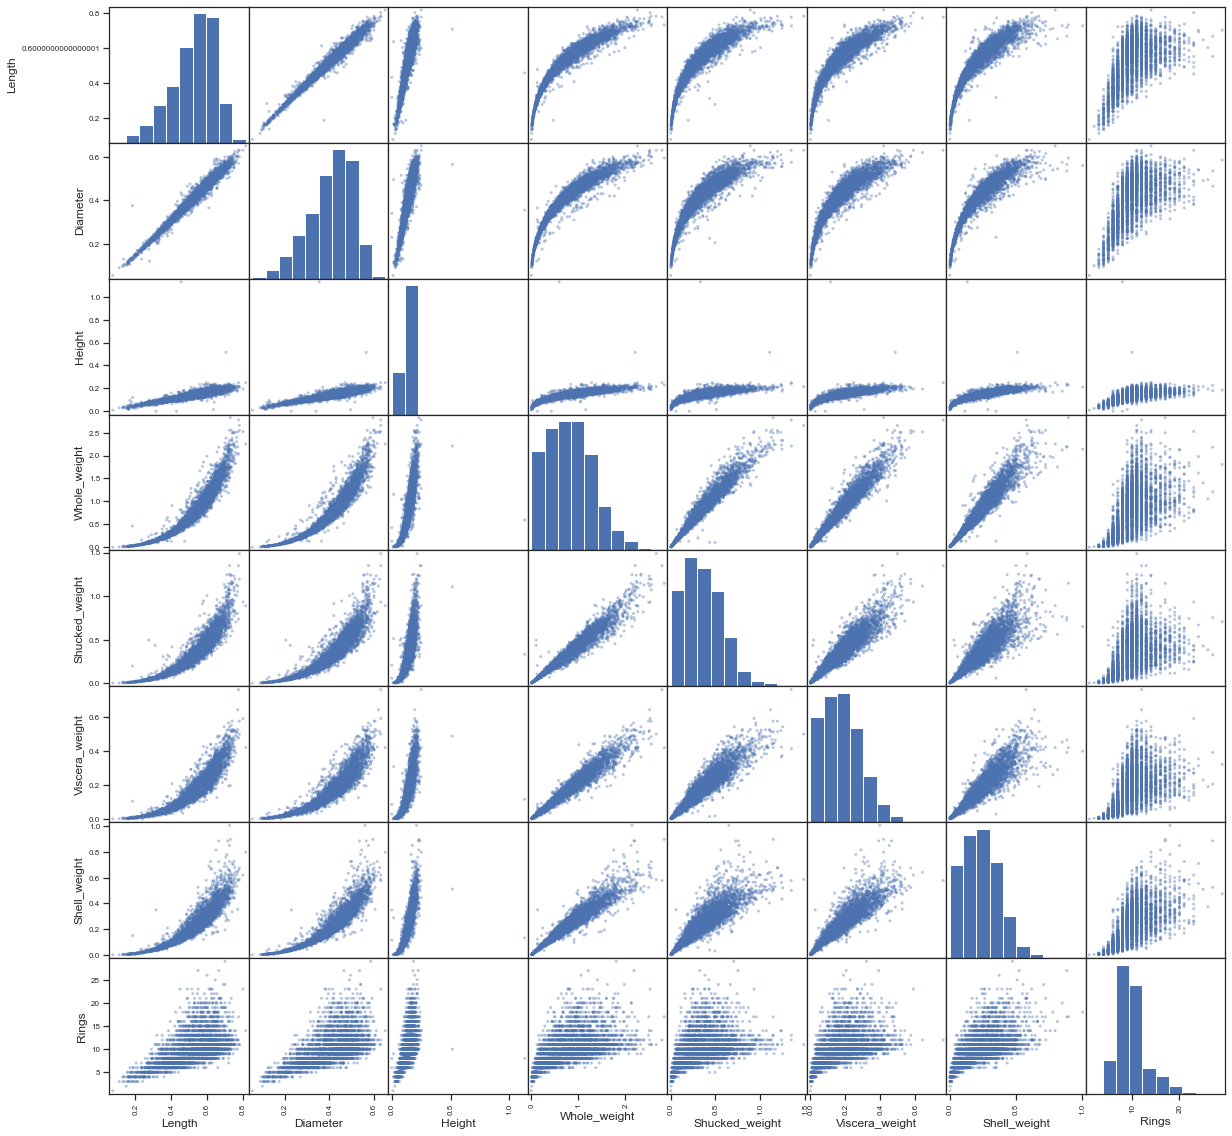

<IPython.core.display.Javascript object>

In [14]:
fig_abalone = pd.plotting.scatter_matrix(abalone, alpha=0.4, figsize=(20, 20))

- As observed in above 2 cells, there are no missing values in any column.
- As confirmed by scatter plot, there are no missing windows/ blocks to confirm that no data is missing.
- There appears to be some outliers in Height and Whole weight that we investigate in depth in below cells.

### 1.3. Diversity of data types and ranges of the features

In order to determine if we need to normalize any of the data we can look at the diversity of scales of the feautres. First we remove the label categories of Sex since it is a nominal feature.

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

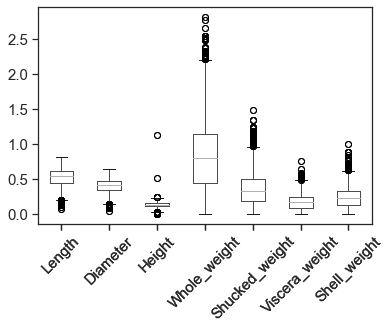

<IPython.core.display.Javascript object>

In [15]:
# we drop 'Sex' as they are nominal values and "rings" as it is the target column
abalone_x = abalone.drop(columns=["Sex", "Rings"])
print(type(abalone_x))
abalone_x.boxplot(grid=False, rot=45, fontsize=15)
# Plotting a simple box plot to see the range of values and detect outliers
pd.plotting.boxplot(abalone_x, grid=False, rot=45, fontsize=15)

<AxesSubplot:>

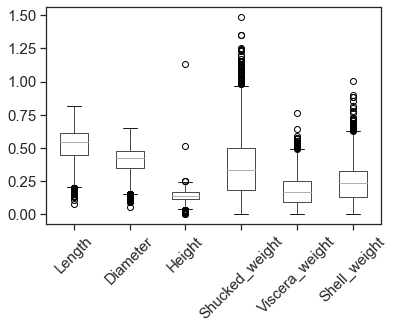

<IPython.core.display.Javascript object>

In [16]:
abalone_x1 = abalone_x.drop(columns=["Whole_weight"])
pd.plotting.boxplot(abalone_x1, grid=False, rot=45, fontsize=15)

> As we can see in the box plots, there are some points away from the maximum, indicating outliers. Similarly we will examine for 'Whole_weight'.

### 1.4. Outlier detection and handling outliers

In [17]:
display(abalone.Height.describe())
display(abalone[abalone.Height == 0])
display(abalone[abalone.Height == abalone.Height.max()])

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
2051,F,0.455,0.355,1.13,0.594,0.332,0.116,0.1335,8


<IPython.core.display.Javascript object>

> We observed that min was 0 and upon close inspection of the data , we can be certain that those values are abnormal as the number of rings and whole weight are consitent with other sample records but Height is inputted wrong and hence would drop those records.

<AxesSubplot:xlabel='Height', ylabel='Rings'>

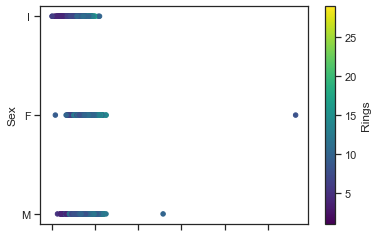

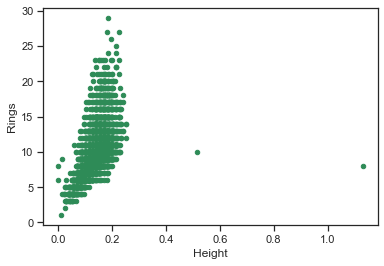

<IPython.core.display.Javascript object>

In [18]:
abalone.plot.scatter(x="Height", y="Sex", c="Rings", colormap="viridis")
abalone.plot.scatter(x="Height", y="Rings", c="Seagreen")

In [19]:
display(abalone[abalone.Height > 0.4])

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


<IPython.core.display.Javascript object>

> As seen from scatter plot above of height vs Rings , there are outliers that is skewing the distribution to right.

In [20]:
# We drop tghe outliers from data
abalone.drop(
    abalone[((abalone.Height > 0.4) | (abalone.Height == 0))].index, inplace=True
)

<IPython.core.display.Javascript object>

In [21]:
# examining whole_weight
abalone.Whole_weight.describe()

count    4173.000000
mean        0.828730
std         0.489987
min         0.002000
25%         0.442000
50%         0.800000
75%         1.153000
max         2.825500
Name: Whole_weight, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Whole_weight', ylabel='Rings'>

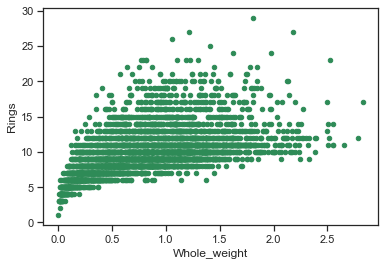

<IPython.core.display.Javascript object>

In [22]:
abalone.plot.scatter(x="Whole_weight", y="Rings", c="Seagreen")

In [23]:
abalone[abalone.Whole_weight > 2.5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
165,M,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.8970,17
1051,F,0.735,0.600,0.220,2.5550,1.1335,0.4400,0.6000,11
1207,F,0.755,0.625,0.210,2.5050,1.1965,0.5130,0.6785,11
1209,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11
1427,F,0.750,0.610,0.235,2.5085,1.2320,0.5190,0.6120,14
1762,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
2334,F,0.800,0.630,0.195,2.5260,0.9330,0.5900,0.6200,23
3715,M,0.780,0.600,0.210,2.5480,1.1945,0.5745,0.6745,11


<IPython.core.display.Javascript object>

> We are not certain if the weight values are abnormal as the rings and height increase with whole_weight. We will need more investigation to drop these records.

In [24]:
# Only Sex column is categorical
print("Number of unique value of Sex : ", abalone.Sex.nunique())
print("Sex wise distribution :\n", abalone.Sex.value_counts())

Number of unique value of Sex :  3
Sex wise distribution :
 M    1527
I    1340
F    1306
Name: Sex, dtype: int64


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Sex'>

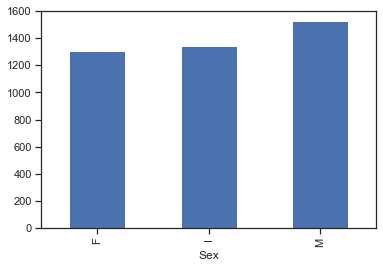

<IPython.core.display.Javascript object>

In [25]:
# Visualizing the distribution of Sex
abalone.groupby("Sex").size().plot.bar()

We observe : 
1. Male>Infant>Female; 
2. Distribution is not uniform but it is not very skewed.

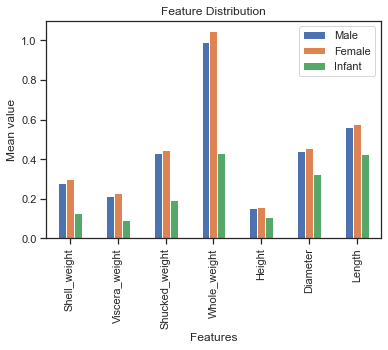

<IPython.core.display.Javascript object>

In [26]:
# Visualizing to compare features with Sex distribution

df_male_abalone = abalone[abalone.Sex == "M"]
df_male_abalone.drop(columns=["Sex", "Rings"], axis=1, inplace=True)

df_female_abalone = abalone[abalone.Sex == "F"]
df_female_abalone.drop(columns=["Sex", "Rings"], axis=1, inplace=True)

df_infant_abalone = abalone[abalone.Sex == "I"]
df_infant_abalone.drop(columns=["Sex", "Rings"], axis=1, inplace=True)

df_male_abalone = df_male_abalone.mean()
df_female_abalone = df_female_abalone.mean()
df_infant_abalone = df_infant_abalone.mean()

# print(df_male_abalone.values[::-1])
index = df_male_abalone.index[::-1]

df_plt = pd.DataFrame(
    {
        "Male": df_male_abalone.values[::-1],
        "Female": df_female_abalone.values[::-1],
        "Infant": df_infant_abalone.values[::-1],
    },
    index=index,
)

ax = df_plt.plot.bar(
    rot=90, xlabel="Features", ylabel="Mean value", title="Feature Distribution"
)

> Infants have lower values comapred to male and female ditribution, whic is expected.
> Females have higher values of features compared to Males

### 1.5. Checking if Data is Balanced or not

Unique values for number of rings are : 28


<Figure size 432x432 with 0 Axes>

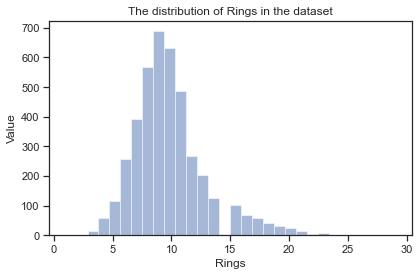

<IPython.core.display.Javascript object>

In [27]:
print("Unique values for number of rings are :", abalone.Rings.nunique())
# abalone.Rings.hist()
plt.figure(figsize=(6, 6))
col = "Rings"
ab = abalone.hist(column=col, bins=30, alpha=0.5, label="white")

plt.title("The distribution of {} in the dataset".format(col))
plt.xlabel("Rings")
plt.ylabel("Value")
# plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

> Rings are densely distributed between 5 and 15 rings.THe dataset is usable and not highly unbalanced.

Text(0.5, 1.0, 'Correlation Heatmap of Features')

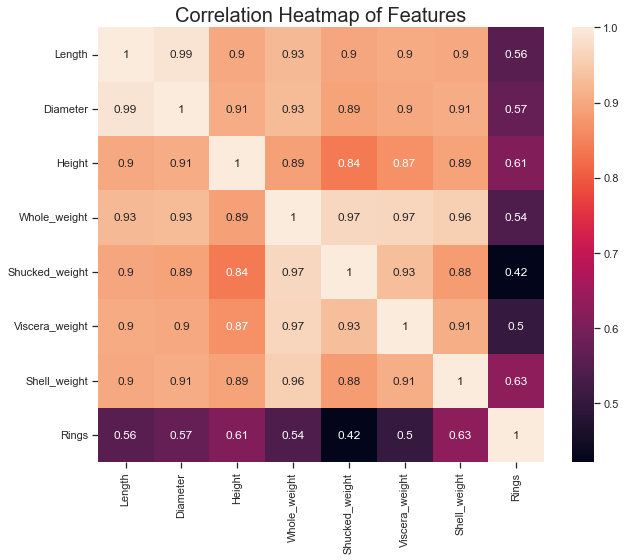

<IPython.core.display.Javascript object>

In [28]:
# Using heatmap to visualize corelation between features

plt.figure(figsize=(10, 8))
corr = abalone.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap of Features", fontsize=20)

           Height is highly corelated with all the features and rings.

<AxesSubplot:xlabel='Height', ylabel='Length'>

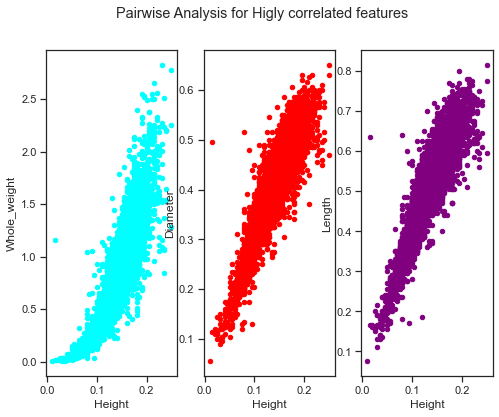

<IPython.core.display.Javascript object>

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 6))
fig.suptitle("Pairwise Analysis for Higly correlated features")
abalone.plot.scatter(x="Height", y="Whole_weight", c="Cyan", ax=ax1)
abalone.plot.scatter(x="Height", y="Diameter", c="Red", ax=ax2)
abalone.plot.scatter(x="Height", y="Length", c="Purple", ax=ax3)

- Whole weight increases almost at 2nd degree wrt height except few points close to 0.
- Diameter and Length approximates linear increase wrt Height. 

### 1.6.a. Is normalization necessary?

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Shucked_weight'}>],
       [<AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

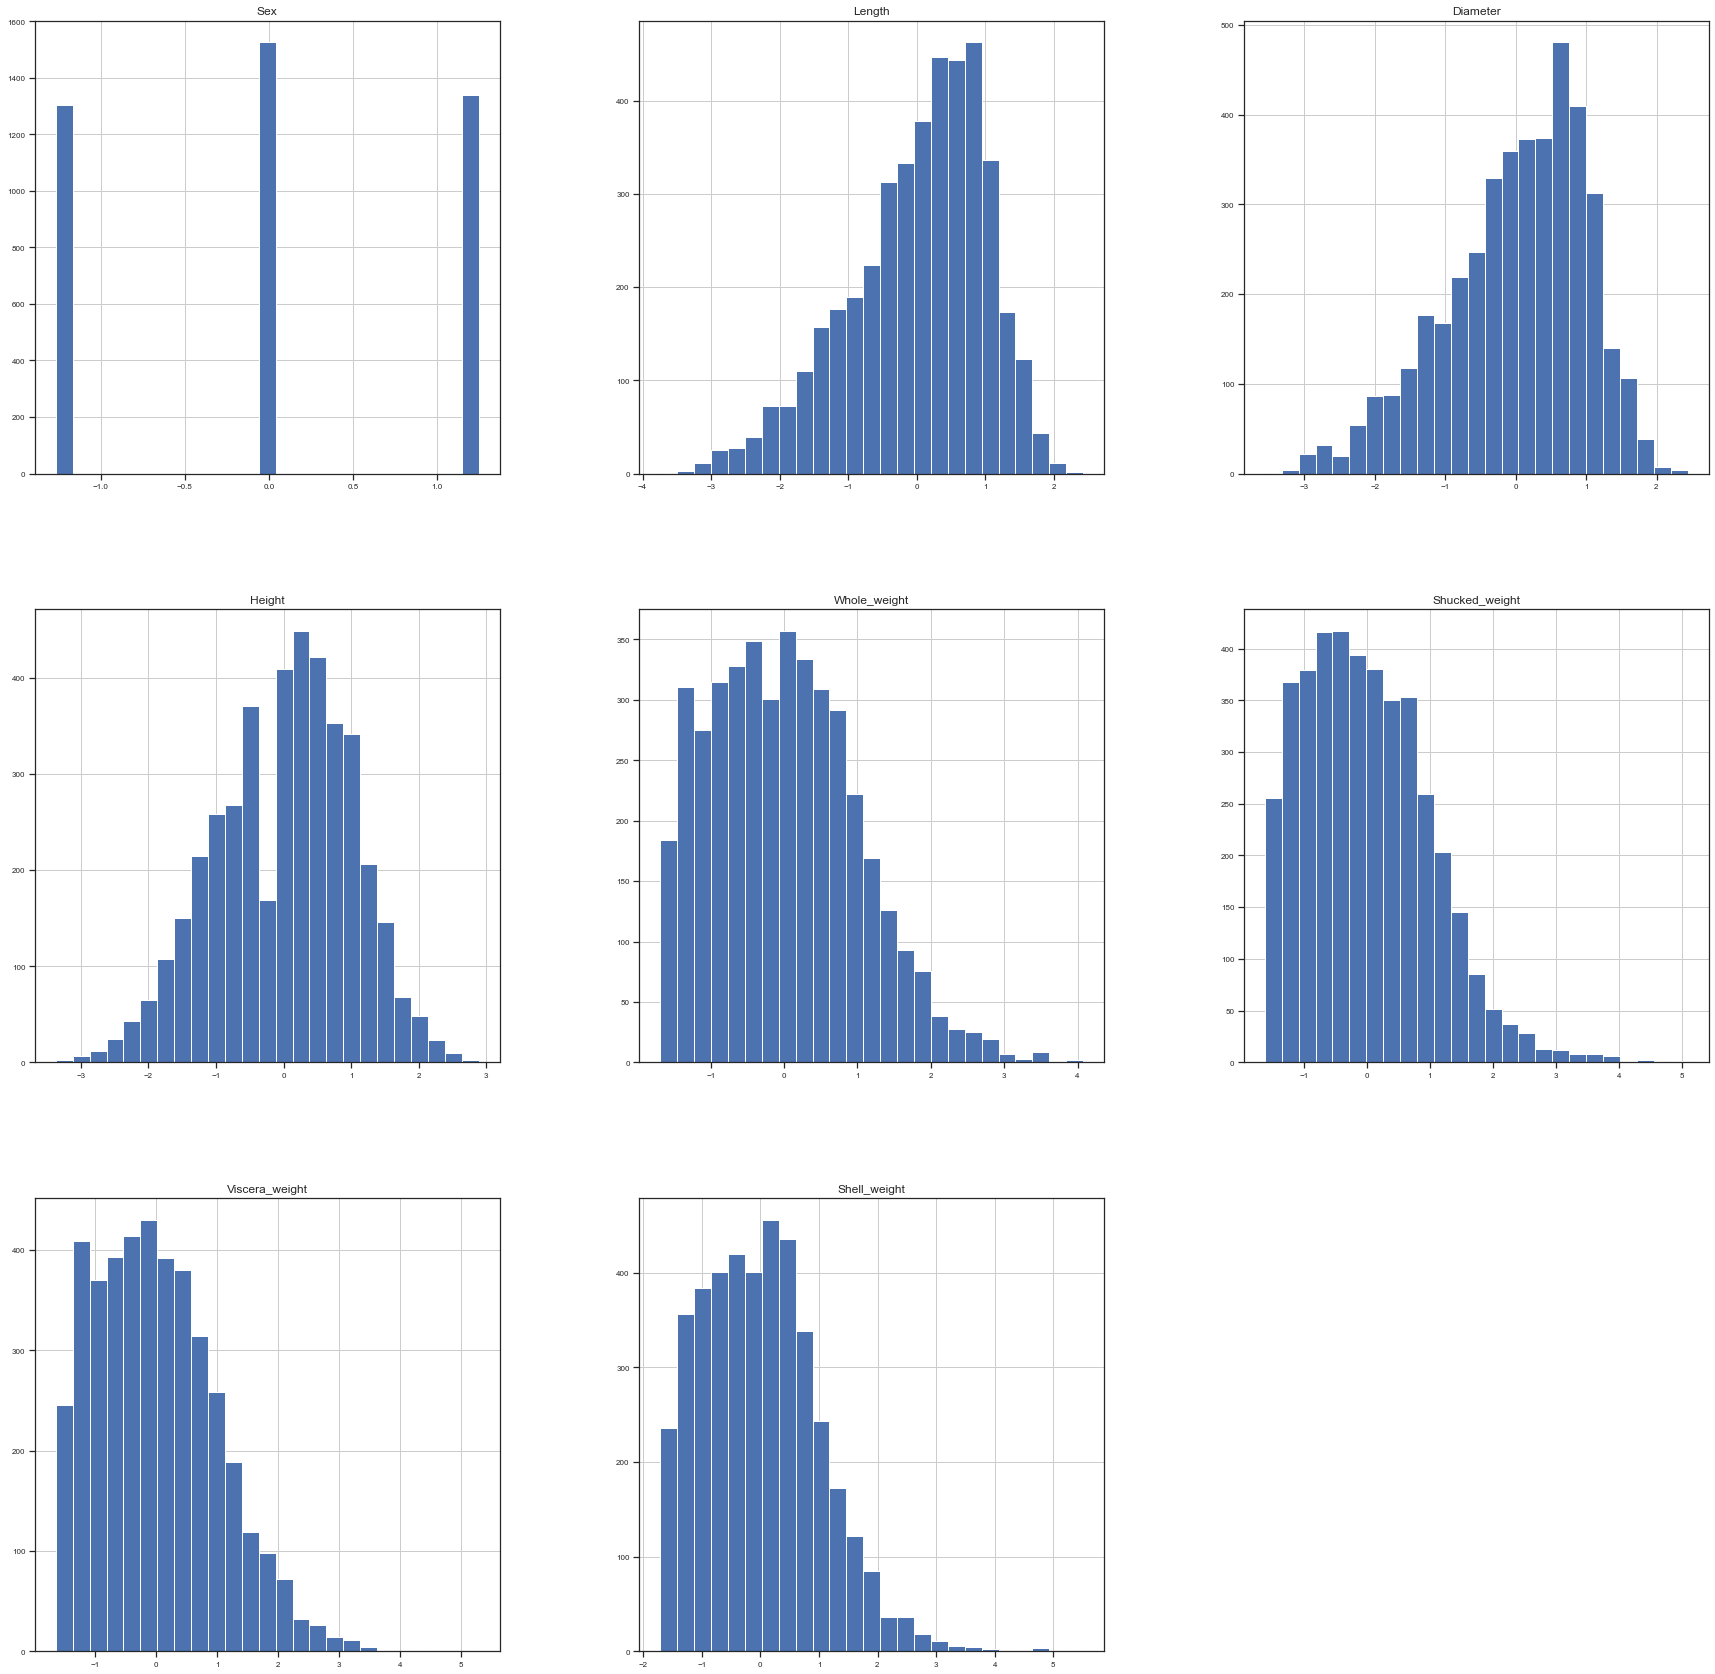

<IPython.core.display.Javascript object>

In [31]:
Y = abalone["Rings"].values
abalone.drop(columns=["Rings"], inplace=True)
abalone_without_sex = abalone.drop(columns=["Sex"])
abalone["Sex"] = abalone["Sex"].apply({"M": 1, "F": 0, "I": 2}.get)
plt.figure()
# abalone_znormalized = abalone_without_sex.apply(stats.zscore)
abalone_znormalized = abalone.apply(stats.zscore)
# print(abalone_znormalized.head())
abalone_znormalized.hist(figsize=(30, 30), bins=25, xlabelsize=8, ylabelsize=8)

We do not normalize target('Rings') as it is a classification problem, normalizing converts rings into continous values which is a regression problem and we encounter challenge via fitting data to KNN classifier.

Normalization is not critical but will improve the classification task For the reasons why you can refer to our discussion of data diversity in Question 1(a).

In [32]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


<IPython.core.display.Javascript object>

### 1.6.b. Unormalized Comparison of three values

To make the difference that normalization makes on interpretation clear we look at some specific examples, choosing one continuous value, such as Height and comparing to two other numerical features under differnet normalization schemes.

In [33]:
x = ["Height"]
y = ["Whole_weight", "Diameter"]
ab_whd = abalone[x + y]
ab_whd.sort_values(by=x, inplace=True)
display(ab_whd.describe())

,Height,Whole_weight,Diameter
count,4173.000000,4173.000000,4173.000000
mean,0.139256,0.828730,0.407915
std,0.038378,0.489987,0.099210
min,0.010000,0.002000,0.055000
25%,0.115000,0.442000,0.350000
50%,0.140000,0.800000,0.425000
75%,0.165000,1.153000,0.480000
max,0.250000,2.825500,0.650000


<IPython.core.display.Javascript object>

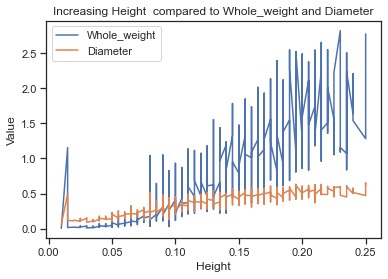

<IPython.core.display.Javascript object>

In [34]:
ab_whd.plot(x=x[0], y=y)
# ab_whd.hist(column=y, bins=10, alpha=.5)

plt.legend(loc="upper right")
plt.title("Increasing {}  compared to {} and {}".format(x[0], y[0], y[1]))
plt.xlabel("Height")
plt.ylabel("Value")
plt.legend(loc="upper left")

### 1.6.c Using Z-Score Normalization

We implement z-score normalization using the sklearn.stats package applied to the entire dataset. Then we once again select out the columns of interest. Note that the x and y variables do not need to be updated since they are just the names of the columns being used and they do not change across the three examples.

In [35]:
abalone_zscore = abalone_without_sex.apply(stats.zscore)
ab_whd_zscore = abalone_zscore[x + y]

<IPython.core.display.Javascript object>

In [36]:
ab_whd_zscore.sort_values(by=x, inplace=True)
display(ab_whd_zscore.describe())

,Height,Whole_weight,Diameter
count,4.173000e+03,4.173000e+03,4.173000e+03
mean,-8.870504e-15,-1.417616e-15,1.362916e-15
std,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.368415e+00,-1.687451e+00,-3.557664e+00
25%,-6.321106e-01,-7.893603e-01,-5.838306e-01
50%,1.939047e-02,-5.864109e-02,1.722286e-01
75%,6.708915e-01,6.618725e-01,7.266720e-01
max,2.885995e+00,4.075637e+00,2.440406e+00


<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

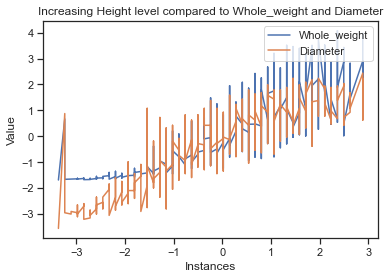

<IPython.core.display.Javascript object>

In [37]:
plt.figure()
ab_whd_zscore.sort_values(by=x, inplace=True)
ab_whd_zscore.plot(x=x[0], y=y)
plt.legend(loc="upper right")
plt.title("Increasing {} level compared to {} and {}".format(x[0], y[0], y[1]))
plt.xlabel("Instances")
plt.ylabel("Value")
plt.legend(loc="upper right")

**Using min-max Normalization**

This we simply implement ourselves since the formula is straightforward. the min() and max() functions will produce vectors of the respective values for every feature, then the formula below will normalize all the values of the new wine-minmax matrix appropriately.

In [38]:
abalone_minmax = (abalone_without_sex - abalone_without_sex.min()) / (
    abalone_without_sex.max() - abalone_without_sex.min()
)
ab_whd_minmax = abalone_minmax[x + y]
display(ab_whd_minmax.describe())

,Height,Whole_weight,Diameter
count,4173.000000,4173.000000,4173.000000
mean,0.538566,0.292803,0.593135
std,0.159906,0.173539,0.166740
min,0.000000,0.000000,0.000000
25%,0.437500,0.155835,0.495798
50%,0.541667,0.282628,0.621849
75%,0.645833,0.407650,0.714286
max,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

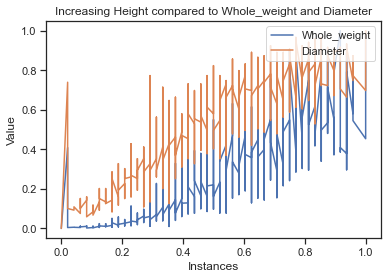

<IPython.core.display.Javascript object>

In [39]:
plt.figure()
ab_whd_minmax.sort_values(by=x, inplace=True)
ab_whd_minmax.plot(x=x[0], y=y)

plt.legend(loc="upper right")
plt.title("Increasing {} compared to {} and {}".format(x[0], y[0], y[1]))
plt.xlabel("Instances")
plt.ylabel("Value")
plt.legend(loc="upper right")

## Classification Task

In [40]:
# df_ab= abalone.copy()
df_ab = abalone_znormalized.copy()
# df_ab['Sex'] = df_ab['Sex'].apply({'M':1, 'F':0, 'I':2}.get)
# df_ab.drop(columns=['Rings'],inplace=True)
df_ab.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.010233,-0.575094,-0.432619,-1.153311,-0.642400,-0.608106,-0.726816,-0.638091
1,-0.010233,-1.449757,-1.440698,-1.283612,-1.231262,-1.171986,-1.206217,-1.212990
2,-1.266124,0.049665,0.121825,-0.110910,-0.309698,-0.463752,-0.356993,-0.206917
3,-0.010233,-0.700046,-0.432619,-0.371510,-0.638318,-0.648705,-0.608108,-0.602160
4,1.245659,-1.616359,-1.541506,-1.544212,-1.273105,-1.217096,-1.288400,-1.320783


<IPython.core.display.Javascript object>

### 2.1. Spliting in test and train set

In [41]:
X = df_ab.values
# X = df_ab.drop('Rings', axis = 1).values
# y = df_ab['Rings'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=27
)

<IPython.core.display.Javascript object>

               Splitting train-test data in 80:20 ratio for Z-Score normalized values

## 2.(2.,3.) With classifier's default parameters

Maximum accuracy:- 0.27305389221556886 at K = 26


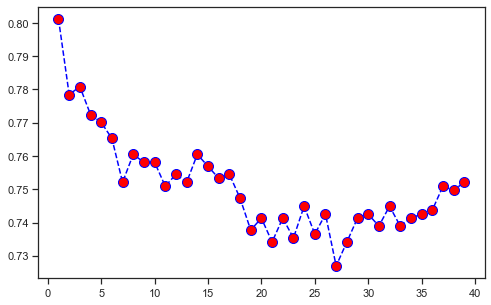

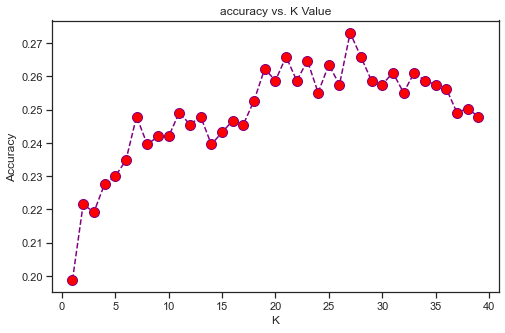

<IPython.core.display.Javascript object>

In [42]:
error_rate, acc = [], []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    # print(y_predi,y_test)
    error_rate.append(np.mean(y_test != y_predi))
    acc.append(metrics.accuracy_score(y_test, y_predi))

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, 40),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, 40),
    acc,
    color="purple",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
print("Maximum accuracy:-", max(acc), "at K =", acc.index(max(acc)))

In [43]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
print("Parameters used in Classifier:\n", knn.get_params())
y_pred = knn.predict(X_test)

knn_train_acc = knn.score(X_train, y_train)
print("Training Score: ", knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print("Testing Score: ", knn_test_acc)

Parameters used in Classifier:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 26, 'p': 2, 'weights': 'uniform'}
Training Score:  0.31845416417016176
Testing Score:  0.25748502994011974


<IPython.core.display.Javascript object>

###  2.4. Weighted KNN classifiers

We use 3 different distance metrics for our comparison:
- Euclidean
- Manhattan
- Minkowski (Default)

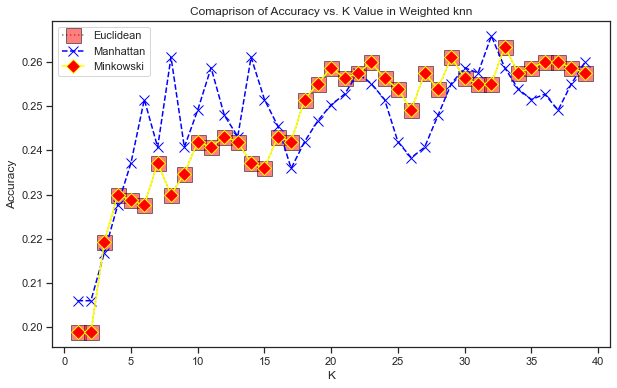

Maximum accuracy for Euclidean :- 0.2634730538922156 at K = 32
Maximum accuracy for Manhattan :- 0.26586826347305387 at K = 31
Maximum accuracy for Minkowski :- 0.2634730538922156 at K = 32


<IPython.core.display.Javascript object>

In [44]:
euclidean, manhattan, minkowski = [], [], []
metric_list = ["euclidean", "manhattan", "minkowski"]
for m in metric_list:
    for k in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric=m)
        knn.fit(X_train, y_train)
        y_predi = knn.predict(X_test)
        if m == "euclidean":
            euclidean.append(metrics.accuracy_score(y_test, y_predi))
        if m == "manhattan":
            manhattan.append(metrics.accuracy_score(y_test, y_predi))
        if m == "minkowski":
            minkowski.append(metrics.accuracy_score(y_test, y_predi))

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 40),
    euclidean,
    label="Euclidean",
    color="black",
    linestyle="dotted",
    marker="s",
    markerfacecolor="red",
    markersize=15,
    alpha=0.5,
)
plt.plot(
    range(1, 40),
    manhattan,
    label="Manhattan",
    color="blue",
    linestyle="dashed",
    marker="x",
    markerfacecolor="red",
    markersize=10,
)
plt.plot(
    range(1, 40),
    minkowski,
    label="Minkowski",
    color="yellow",
    linestyle="solid",
    marker="D",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Comaprison of Accuracy vs. K Value in Weighted knn")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(
    "Maximum accuracy for Euclidean :-",
    max(euclidean),
    "at K =",
    euclidean.index(max(euclidean)),
)
print(
    "Maximum accuracy for Manhattan :-",
    max(manhattan),
    "at K =",
    manhattan.index(max(manhattan)),
)
print(
    "Maximum accuracy for Minkowski :-",
    max(minkowski),
    "at K =",
    minkowski.index(max(minkowski)),
)

### 2.5 Ablation study 

We remove the normalization step and use the un normalized data for our classification task to compare the impact of normalizatin in classification of Rings(age)

In [49]:
# abalone["Sex"] = abalone["Sex"].apply({"M": 1, "F": 0, "I": 2}.get)
# print(abalone.head())
X = abalone.values
print(X)

[[1.     0.455  0.365  ... 0.2245 0.101  0.15  ]
 [1.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
 ...
 [1.     0.6    0.475  ... 0.5255 0.2875 0.308 ]
 [0.     0.625  0.485  ... 0.531  0.261  0.296 ]
 [1.     0.71   0.555  ... 0.9455 0.3765 0.495 ]]


<IPython.core.display.Javascript object>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=27
)
# Splitting our data in 80:20 ratio for training and testing as we previously did

<IPython.core.display.Javascript object>

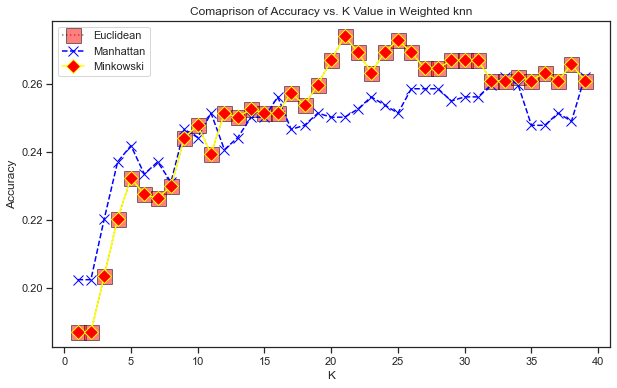

Maximum accuracy for Euclidean :- 0.274251497005988 at K = 20
Maximum accuracy for Manhattan :- 0.2622754491017964 at K = 32
Maximum accuracy for Minkowski :- 0.274251497005988 at K = 20


<IPython.core.display.Javascript object>

In [47]:
euclidean, manhattan, minkowski = [], [], []
metric_list = ["euclidean", "manhattan", "minkowski"]
for m in metric_list:
    for k in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric=m)
        knn.fit(X_train, y_train)
        y_predi = knn.predict(X_test)
        if m == "euclidean":
            euclidean.append(metrics.accuracy_score(y_test, y_predi))
        if m == "manhattan":
            manhattan.append(metrics.accuracy_score(y_test, y_predi))
        if m == "minkowski":
            minkowski.append(metrics.accuracy_score(y_test, y_predi))

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 40),
    euclidean,
    label="Euclidean",
    color="black",
    linestyle="dotted",
    marker="s",
    markerfacecolor="red",
    markersize=15,
    alpha=0.5,
)
plt.plot(
    range(1, 40),
    manhattan,
    label="Manhattan",
    color="blue",
    linestyle="dashed",
    marker="x",
    markerfacecolor="red",
    markersize=10,
)
plt.plot(
    range(1, 40),
    minkowski,
    label="Minkowski",
    color="yellow",
    linestyle="solid",
    marker="D",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Comaprison of Accuracy vs. K Value in Weighted knn")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(
    "Maximum accuracy for Euclidean :-",
    max(euclidean),
    "at K =",
    euclidean.index(max(euclidean)),
)
print(
    "Maximum accuracy for Manhattan :-",
    max(manhattan),
    "at K =",
    manhattan.index(max(manhattan)),
)
print(
    "Maximum accuracy for Minkowski :-",
    max(minkowski),
    "at K =",
    minkowski.index(max(minkowski)),
)

In [50]:
knn = KNeighborsClassifier(n_neighbors=20, weights="distance", metric="euclidean")
knn.fit(X_train, y_train)
print("Parameters used in Classifier:\n", knn.get_params())
y_pred = knn.predict(X_test)

knn_train_acc = knn.score(X_train, y_train)
print("Training Score: ", knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print("Testing Score: ", knn_test_acc)

Parameters used in Classifier:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Training Score:  1.0
Testing Score:  0.26706586826347306


<IPython.core.display.Javascript object>

      
- **Our accuracy score for classification of un-normalized data is similar to the normalized classification data indicating normalization for KNN on abalone data was not critical.**
- **Weighted KNN performs marginally better than KNN classifier based on accuracy score of classification task.**

# References

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

[2] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[3] Compare the effect of different scalers on data with outliers — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January, 2022, from https://scikitlearn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[4] Discussed KNeighbor Classifiers  — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[5] Discussed Normalization techniques and parmeters  — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from https://scikit-learn.org/stable/modules/preprocessing.html#normalization contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[6] Discussed different distance metrics  — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric

[7] Discussed axes, plotting and figures in python  — matplotlib.org documentation. (n.d.). Retrieved January 27, 2022, from https://matplotlib.org/stable/api/legend_api.html?highlight=legends conributed by
J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

[8] Discussed plotting of dataframe columns inpython  — pandas.org documentation. (n.d.). Retrieved January 27, 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html
contributed by McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).

[9] Vijay, S. (2020). Abalone_Age_prediction. Retrieved from https://www.kaggle.com/sanchitvj/abalone-age-prediction

[10] Desai H. (2019). EDA_of_Abalone_features. Retieved from https://www.kaggle.com/hurshd0/eda-of-abalone-feature
